### Are there any age or gender or topic based correlations by location in the posts? `(Todd)`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm

In [2]:
df = pd.read_csv('../Datasets/Master_Dataset_GeoTopic.csv')

# set the width of the 'Narrative' column to 100 characters
pd.options.display.max_colwidth = 100

In [3]:
df.sample(5)

,Unnamed: 0,Story Primary ID,Story ID,User Primary ID,User ID,Gender,Age,Title,Narrative,Media,Account Created Date,Date (No Timestamp),Interest,Narrative LangDetect,Narrative TikaDetect,Clean Narrative,translated_text,GeoTopic Name,GeoTopic Latitude,GeoTopic Longitude
64933,64933,120050,STY1659095187,50679,USR1656567084,NaN,43,Charri Mubarak taken to Sharika Bhawani temple in Srinagar to pay obeisance,Charri Mubrak (silver mace) of Amarnath was taken to the ancient 'Sharika Bhawani' temple at Har...,https://image.pixstory.com/Pixstory-image-165909502956893.png,6/30/22 11:01,6/30/22,"amarnath yatra, holycave, pilgrimage",[en:0.9999973669568804],en,Charri Mubrak silver mace of Amarnath was taken to the ancient Sharika Bhawani temple at Hari Pa...,Charri Mubrak silver mace of Amarnath was taken to the ancient Sharika Bhawani temple at Hari Pa...,NaN,NaN,NaN
61763,61763,152080,STY1664899091,40932,USR1654101857,male,24,Sammy Guevara is the root of all the problems at AEW,"<p dir=""ltr"">Sammy Guevara, the up and coming, talent and a future headliner has been nothing bu...",https://image.pixstory.com/Pixstory-image-166489867382283.png,6/1/22 22:14,6/1/22,"Technology, History, Food, Entertainment, Sports, Environment, Science, Inequality, Education, H...",[en:0.9999972269059196],en,Sammy Guevara the up and coming talent and a future headliner has been nothing but a problem chi...,Sammy Guevara the up and coming talent and a future headliner has been nothing but a problem chi...,Jericho,31.86667,35.45000
46090,46090,84799,STY1646240219,28668,USR1646197460,NaN,20,Vice President Kamala Harris to visit Durham,"According to a media advisory given by the Vice President's press office, Vice President Kamala ...",https://image.pixstory.com/Pixstory-image-164624013230147.jpeg,3/2/22 10:34,3/2/22,vice president,[en:0.999996772773281],en,According to a media advisory given by the Vice President s press office Vice President Kamala H...,According to a media advisory given by the Vice President s press office Vice President Kamala H...,North Carolina,35.50069,-80.00032
4340,4340,98838,STY1651900252,767,USR1614283251,male,36,Controversial YouTuber Kevin Samuels Dies,There’s a lot of controversy today among black women regarding the untimely death of Kevin Samue...,https://image.pixstory.com/Pixstory-image-165189941920420.jpeg,2/26/21 1:30,2/26/21,"kevinsamuels, death, youtube, relationships",[en:0.9999980167838812],en,There s a lot of controversy today among black women regarding the untimely death of Kevin Samue...,There s a lot of controversy today among black women regarding the untimely death of Kevin Samue...,NaN,NaN,NaN
23456,23456,118072,STY1658481634,12582,USR1639060058,female,55,"Addio a An An, il panda più vecchio in cattività. Aveva 35 anni pari a 105 della vita umana",È morto An An il panda centenario star dell’Ocean Park di Hong Kong. Da qualche settimana non vo...,https://image.pixstory.com/Pixstory-image-165848099286914.jpeg,12/9/21 19:57,12/9/21,"panda, hong kong",[it:0.9999978942559535],it,morto An An il panda centenario star dell Ocean Park di Hong Kong Da qualche settimana non vole...,dead An An the centenary panda star of Hong Kong&#39;s Ocean Park For some weeks he has not want...,Ocean Park Subbarrio,18.45750,-66.04819


In [4]:
# replace df with your original DataFrame
df = df.loc[:, ["Gender", "Age", "Interest", "GeoTopic Name"]]

In [5]:
# df.sample(20)[['Narrative', 'GeoTopic Name', 'GeoTopic Latitude', 'GeoTopic Longitude']]
df.sample(5)

,Gender,Age,Interest,GeoTopic Name
56584,female,22,"bbmas, music awards",Las Vegas
7155,male,69,"neeraj kumar, books",British Indian Ocean Territory
1262,male,30,lewis hamilton,NaN
36938,female,15,"sfsarsd, new york, skyline, travel",NaN
21279,male,21,bangladesh,NaN


In [6]:
# df = df.rename(columns={'GeoTopic Name': 'Location'})
df['Gender'] = df['Gender'].astype(str)
df['Age'] = df['Age'].astype(int)
df['Interest'] = df['Interest'].astype(str)
df['GeoTopic Name'] = df['GeoTopic Name'].astype(str)

In [7]:
# Replace negative values with their absolute value
df['Age'] = np.abs(df['Age'])

# Replace values greater than 80 with 80
df['Age'] = np.where(df['Age'] > 80, 80, df['Age'])

In [8]:
df_AgeLocation = df.loc[:, ["Age", "GeoTopic Name"]]
df_GenderLocation = df.loc[:, ["Gender", "GeoTopic Name"]]
df_InterestLocation = df.loc[:, ["Interest", "GeoTopic Name"]]

In [9]:
# remove rows with 'GeoTopic Name' of 'nan'
df_AgeLocation = df_AgeLocation[df_AgeLocation['GeoTopic Name'] != 'nan']
df_GenderLocation = df_GenderLocation[df_GenderLocation['GeoTopic Name'] != 'nan']
df_InterestLocation = df_InterestLocation[df_InterestLocation['GeoTopic Name'] != 'nan']

# df_GenderLocation = df_GenderLocation[(df_GenderLocation['Gender'] == 'female') & (df_GenderLocation['Gender'] == 'male')]

# Age vs Location

In [ ]:
# count the frequency of each GeoTopic Name
counts = df_AgeLocation['GeoTopic Name'].value_counts()

# filter to include only GeoTopic Names with 10 or more counts
valid_names = counts[counts >= 300].index

# filter the original dataframe using the valid GeoTopic Names
df_AgeLocation = df_AgeLocation[df_AgeLocation['GeoTopic Name'].isin(valid_names)]

In [ ]:
# create a pivot table
pivot_table = df_AgeLocation.pivot_table(index='Age', columns='GeoTopic Name', aggfunc=len, fill_value=0)

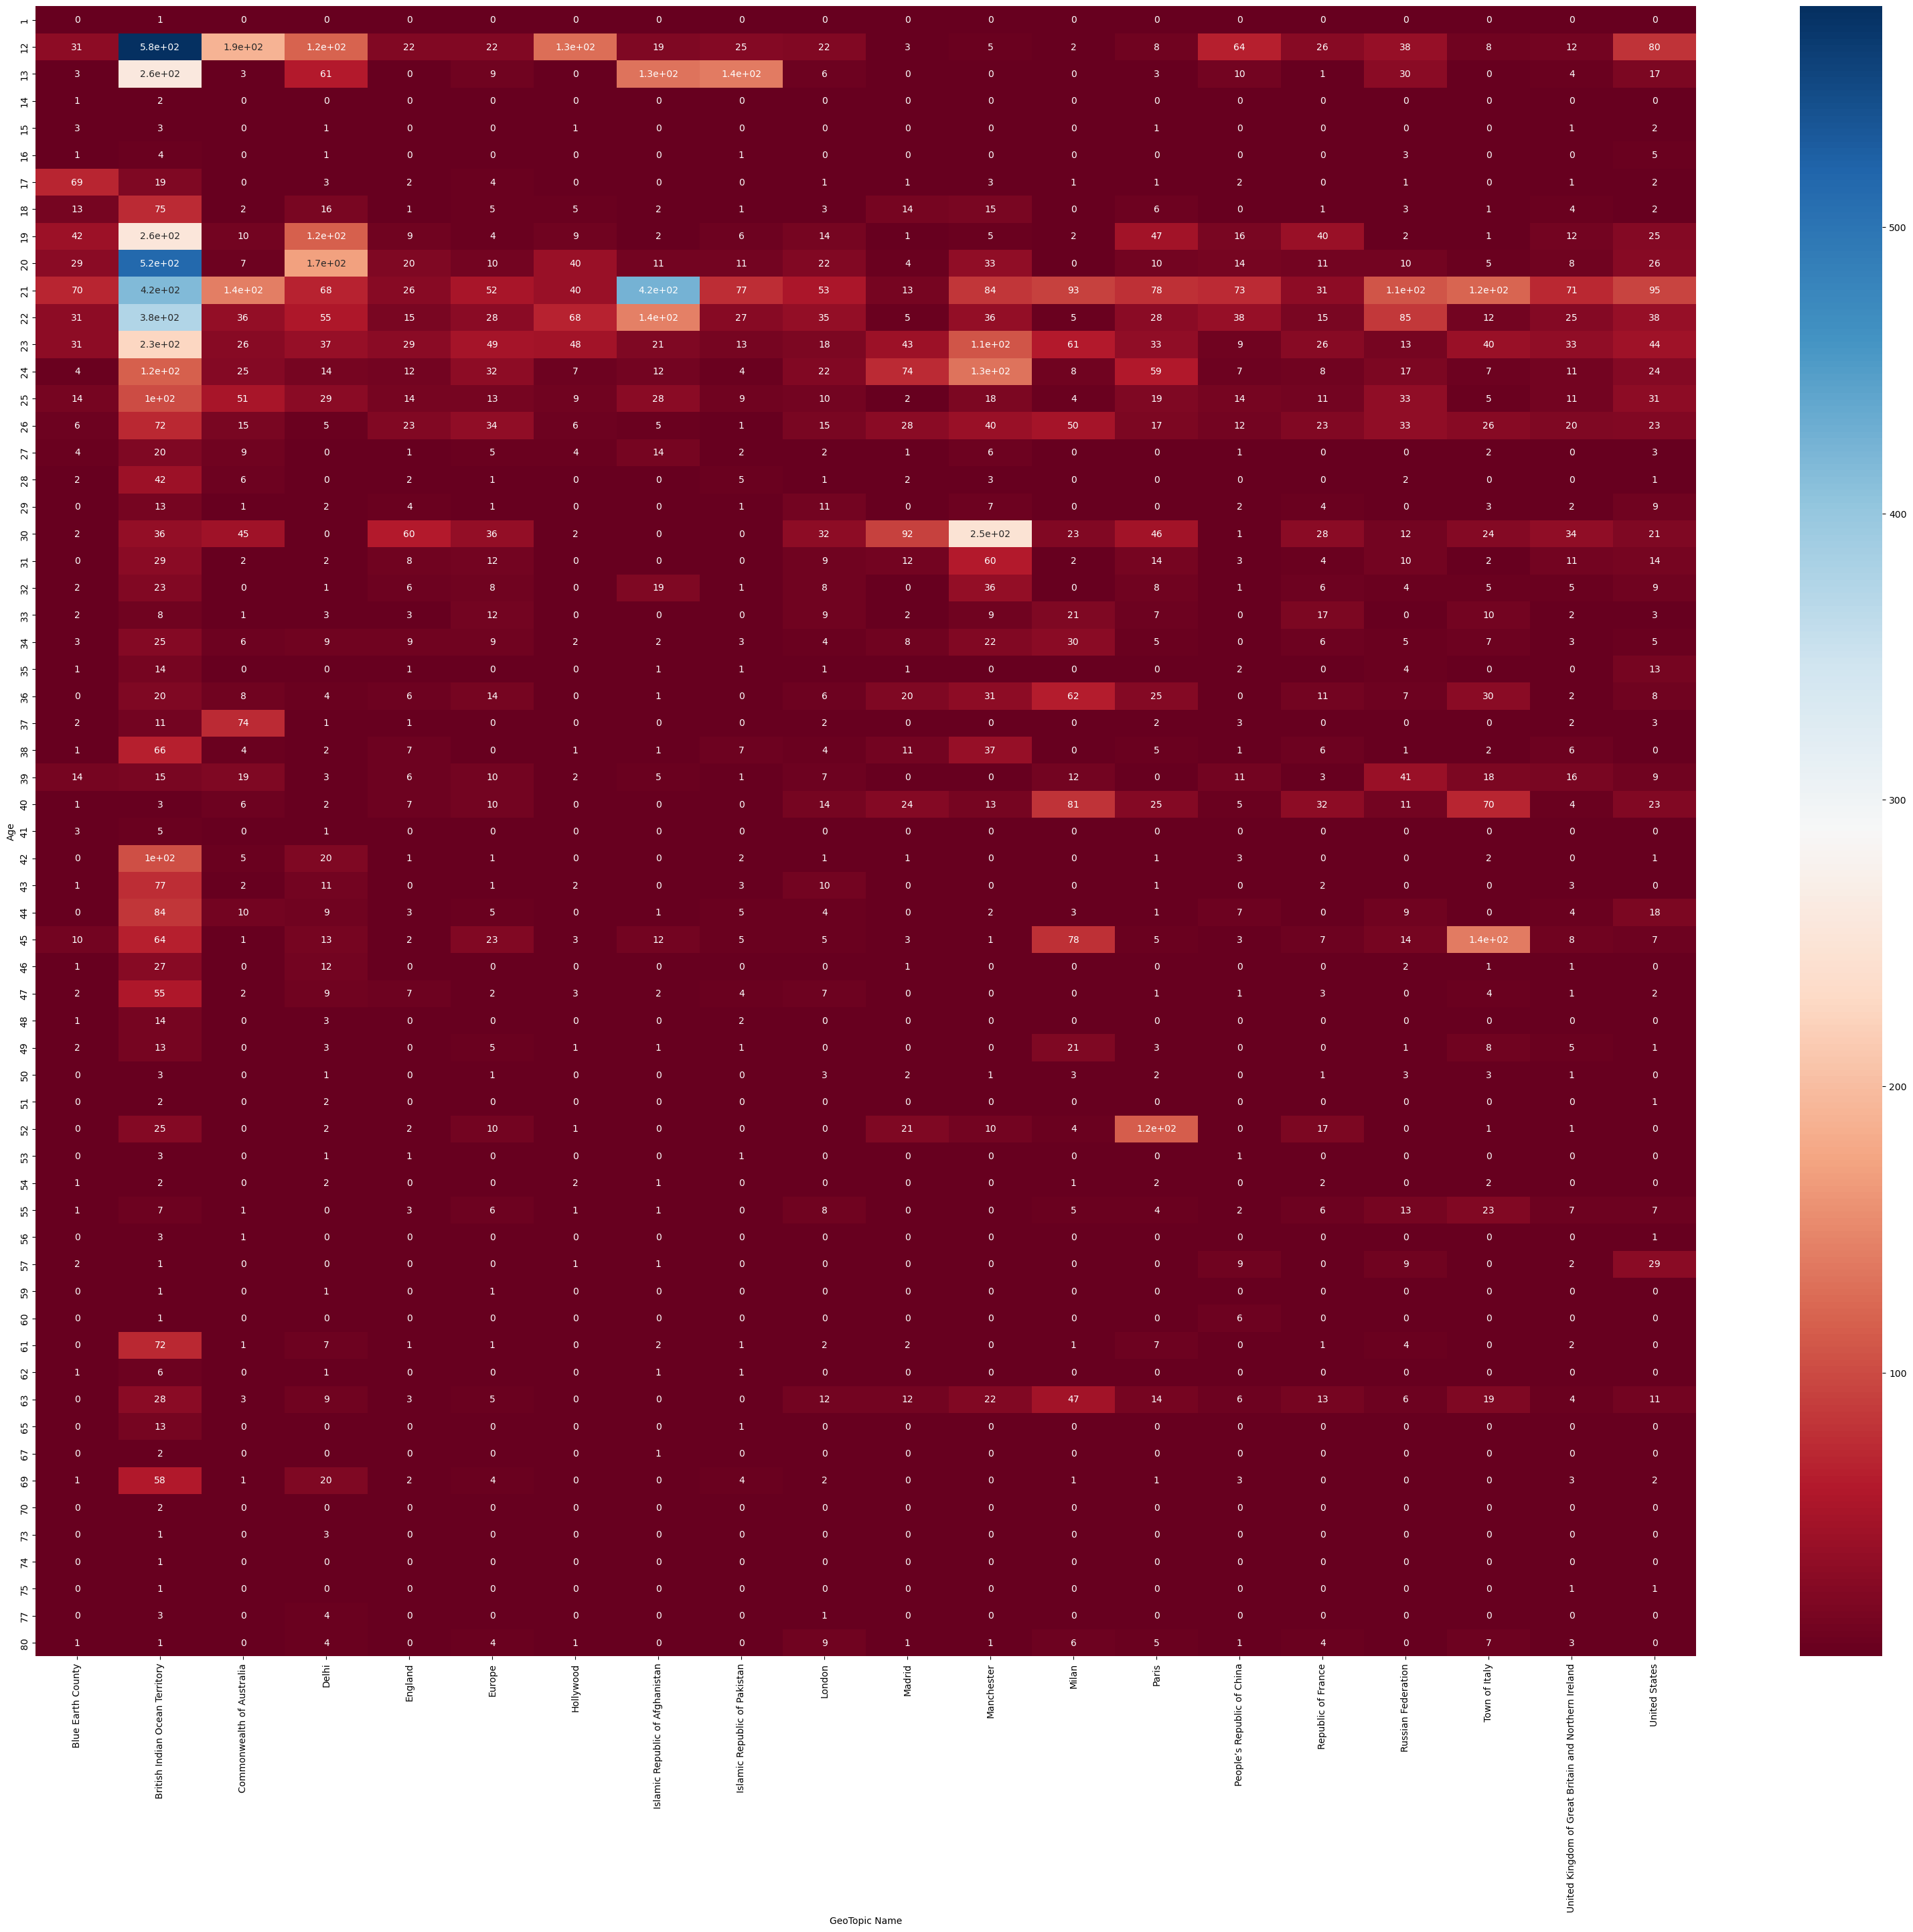

In [ ]:
# Set figure size
fig, ax = plt.subplots(figsize=(40, 32))

# create a heatmap
sns.heatmap(pivot_table, annot=True, cmap='RdBu', vmin=1, vmax=pivot_table.values.max())

# Save the chart as a PNG image
fig.savefig('q1_figures/ageVsLocationHeatMap.png')

# Show figure
plt.show()

# Close the figure to free up memory
plt.close(fig)

There are a few significant correlations between Age and GeoTopic Name (location). To determine these correlations, I created a heatmap that shows the GeoTopic Name along the X-axis and the Age along the Y-Axis. 
- As we can see from figure "ageVsLocationHeatMap.png", the GeoTopic name of "British Indian Ocean Territory" has the greatest clustering of asssoiciating user narratives with ages between 18 and 24. This group also has a signficiant amount of users between the ages of 42 and 47. 
- This is logical because Pixstory is a social media that is very popular in India.
- The GeoTopic Name "Islamic Republic of Afghanistan" has a cluster of associated user narratives with ages between 21 and 22.
- The GeoTopic Name "Manchester" has a cluster of associated user narratives with ages between 21 and 24.

Overall, for all GeoTopic Names, narratives with associating user ages between 18 and 26 is the greatest.

# Gender vs Location

In [18]:
# count the frequency of each GeoTopic Name
counts = df_GenderLocation['GeoTopic Name'].value_counts()

# filter to include only GeoTopic Names with 10 or more counts
valid_names = counts[counts >= 300].index

# filter the original dataframe using the valid GeoTopic Names
df_GenderLocation = df_GenderLocation[df_GenderLocation['GeoTopic Name'].isin(valid_names)]

In [19]:
# df_GenderLocation = df_GenderLocation.iloc[:10000]

In [20]:
# create a pivot table
pivot_table = df_GenderLocation.pivot_table(index='Gender', columns='GeoTopic Name', aggfunc=len, fill_value=0)

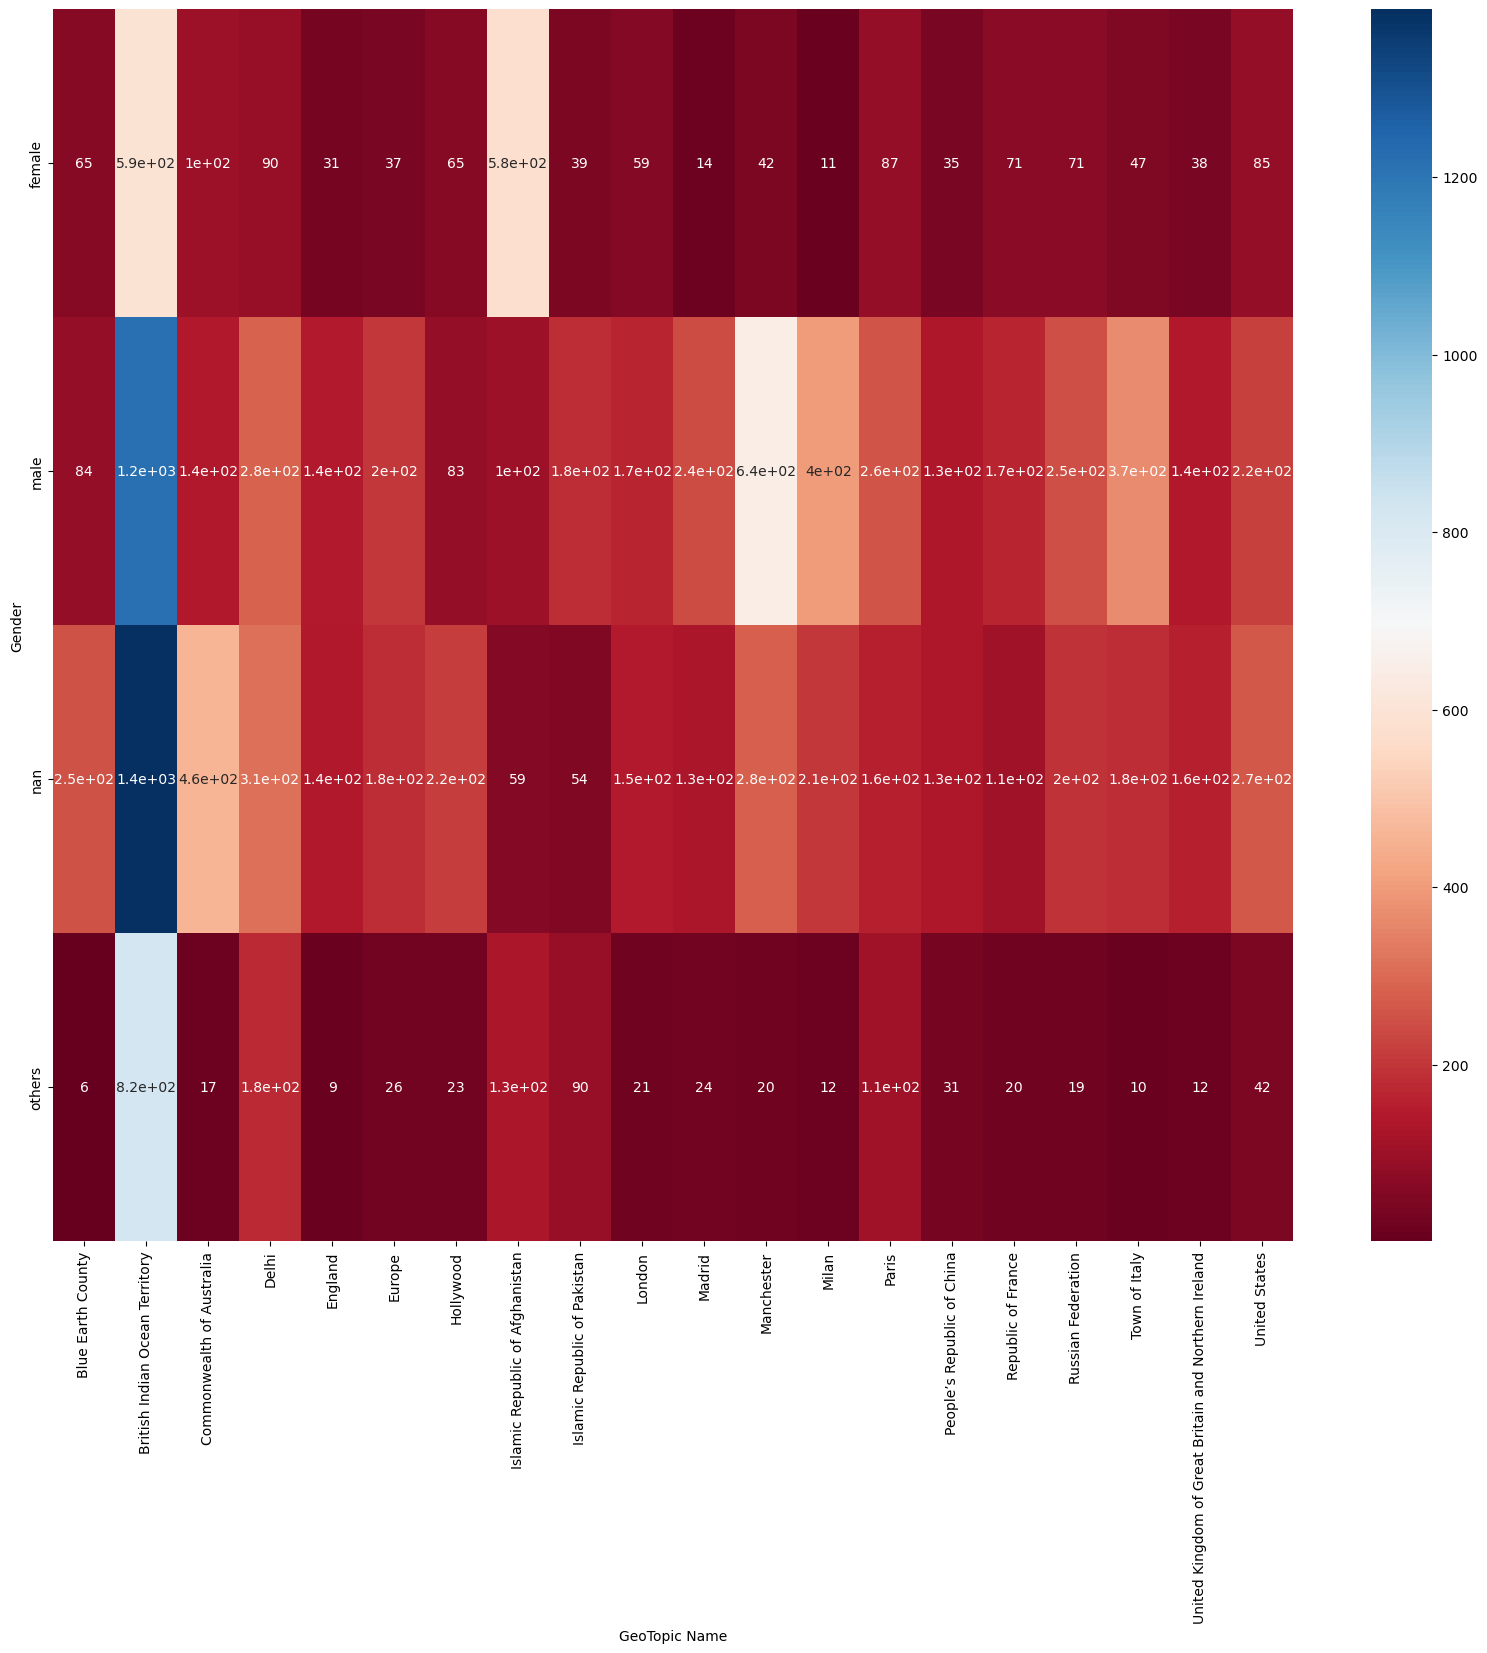

In [21]:
# Set figure size
fig, ax = plt.subplots(figsize=(20, 16))

# create a heatmap
sns.heatmap(pivot_table, annot=True, cmap='RdBu', vmin=1, vmax=pivot_table.values.max())

# Save the chart as a PNG image
fig.savefig('q1_figures/genderVsLocationHeatMap.png')

# Show figure
plt.show()

# Close the figure to free up memory
plt.close(fig)

There are a few significant correlations between Gender and GeoTopic Name (location). To determine these correlations, I created a heatmap that shows the GeoTopic Name along the X-axis and the Gender along the Y-Axis. 
- As we can see from figure "genderVsLocationHeatMap.png", the GeoTopic name of "British Indian Ocean Territory" has the greatest number of associaitng user narratives for males over females.
- The "Islamic Republic of Afghanistan" is the only GeoTopic with more females than males.

# Interest vs Location

In [ ]:
# count the frequency of each GeoTopic Name
counts = df_InterestLocation['GeoTopic Name'].value_counts()

# filter to include only GeoTopic Names with 10 or more counts
valid_names = counts[counts >= 500].index

# filter the original dataframe using the valid GeoTopic Names
df_InterestLocation = df_InterestLocation[df_InterestLocation['GeoTopic Name'].isin(valid_names)]

In [ ]:
df_InterestLocation = df_InterestLocation.iloc[:1000]

In [ ]:
# Create a new dataframe to store the expanded rows
new_df_InterestLocation = pd.DataFrame(columns=["Interest", "GeoTopic Name"])

# Loop through each row of the original dataframe
for index, row in df_InterestLocation.iterrows():
    # Split the interests into a list
    interests_list = row["Interest"].split(",")
    # Loop through each interest and add a new row to the new dataframe
    for interest in interests_list:
        new_df_InterestLocation = new_df_InterestLocation.append({"Interest": interest.strip(), "GeoTopic Name": row["GeoTopic Name"]}, ignore_index=True)

In [ ]:
# count the frequency of each GeoTopic Name
counts = new_df_InterestLocation['Interest'].value_counts()

# filter to include only GeoTopic Names with 10 or more counts
valid_names = counts[counts >= 8].index

# filter the original dataframe using the valid GeoTopic Names
new_df_InterestLocation = new_df_InterestLocation[new_df_InterestLocation['Interest'].isin(valid_names)]

In [ ]:
new_df_InterestLocation.sample(20)

,Interest,GeoTopic Name
3427,Education,Delhi
2211,ukraine,Russian Federation
4774,usa,Russian Federation
2424,Entertainment,British Indian Ocean Territory
5273,Science,Delhi
2343,Inequality,British Indian Ocean Territory
3024,Climate change,British Indian Ocean Territory
4688,Science,Delhi
510,india,British Indian Ocean Territory
3300,Sports,Delhi


In [ ]:
# create a pivot table
pivot_table = new_df_InterestLocation.pivot_table(index='Interest', columns='GeoTopic Name', aggfunc=len, fill_value=0)

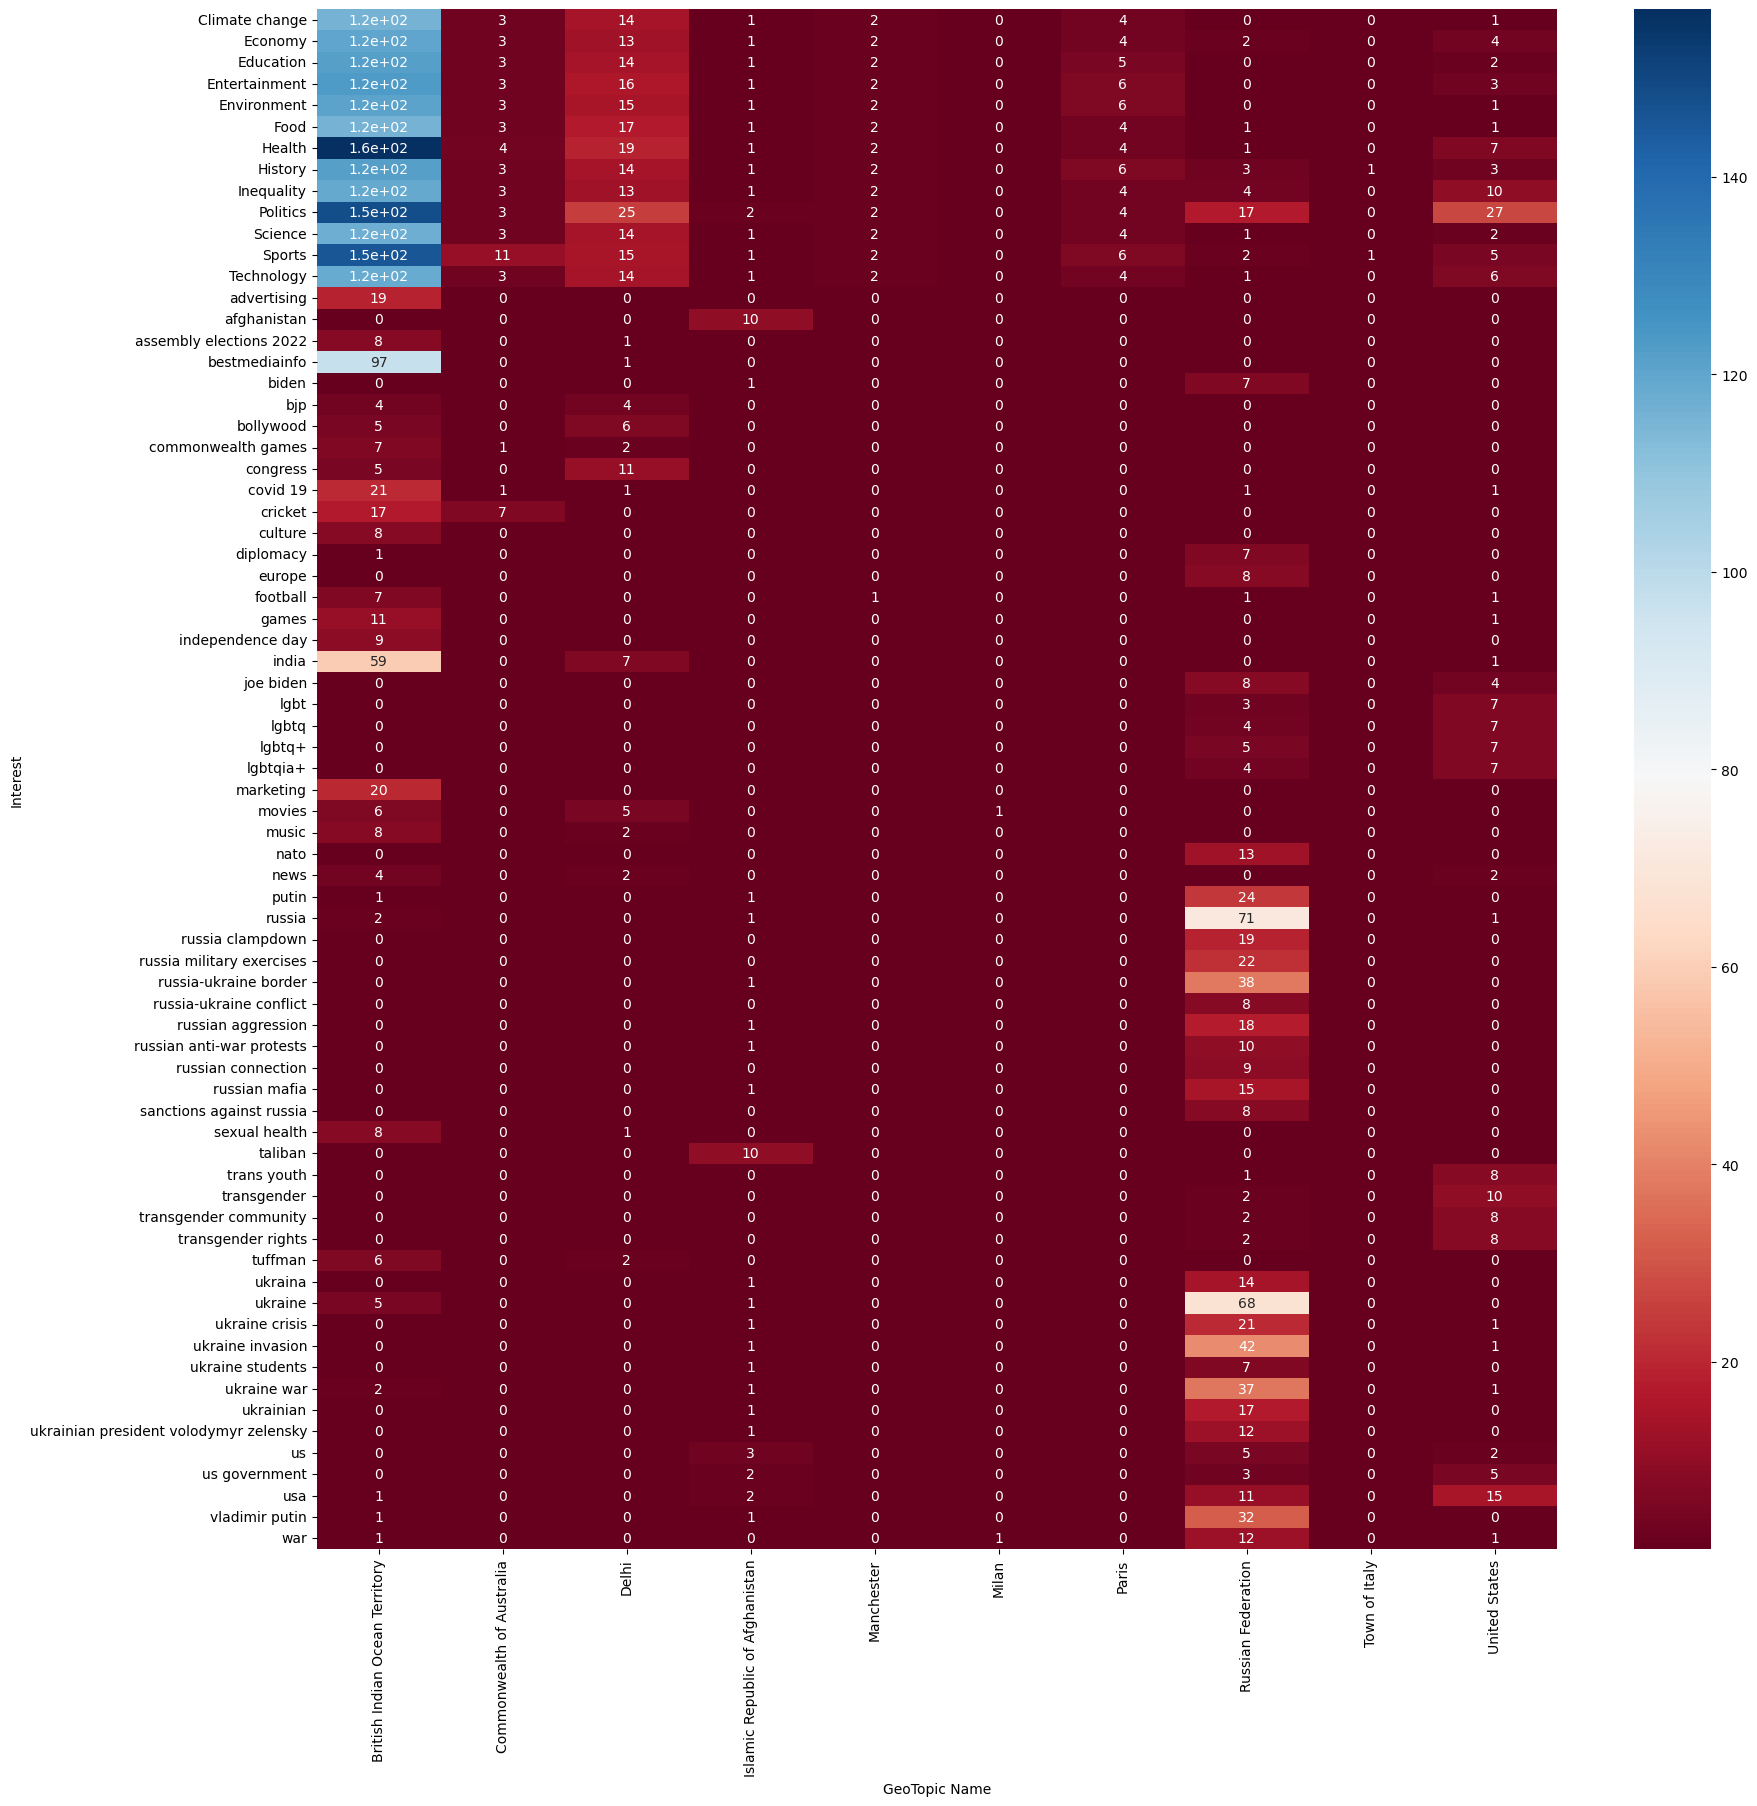

In [ ]:
# Set figure size
fig, ax = plt.subplots(figsize=(20, 20))

# create a heatmap
sns.heatmap(pivot_table, annot=True, cmap='RdBu', vmin=1, vmax=pivot_table.values.max())

# Save the chart as a PNG image
fig.savefig('q1_figures/interestsVsLocationHeatMap.png')

# Show figure
plt.show()

# Close the figure to free up memory
plt.close(fig)

There are a few significant correlations between Interest and GeoTopic Name (location). To determine these correlations, I created a heatmap that shows the GeoTopic Name along the X-axis and the Interests along the Y-Axis. 
- As we can see from figure "interestsVsLocationHeatMap.png", the GeoTopic name of "British Indian Ocean Territory" has the greatest greatest clustering for multiple interests such as health, politics, and sports.
- However, the Geotopic "Russian Federation", shows a high amount if Interest clustering for topics surrounfing the Russia-Ukraine War such as war, ukraine war, ukraine, us government, vladimir putin, etc.